### Wczytanie bibliotek

In [462]:
import pandas as pd
import numpy as np
import json

### Wczytanie danych

In [463]:
#Otwieranie pliku
df = pd.read_json('dane_z_4_portali_poprawione.json', orient='index')
df=df.T

### Usuwanie nie potrzebnych kolumn

In [464]:
df.columns

Index(['kuchnia', 'rynek', 'balkon', 'liczba_pieter_budynku', 'rok_budowy',
       'powierzchnia-uzytkowa', 'miasto', 'liczba_pokoi', 'wykonczenie',
       'ulica', 'pietro', 'rodzaj_zabudowy', 'powierzchnia', 'dzielnica',
       'forma-wlasnosci', 'cena', 'adres', 'serwis', 'material_budynku',
       'cena_za_metr', 'oferta', 'ogrzewanie', 'winda', 'czynsz', 'url',
       'tytul', 'tresc', 'nr_licencji_posrednika', 'typ_nieruchomosci',
       'nr_oferty', 'typ_ogrzewania', 'id_ogloszenia', 'data_wyroznienia',
       'data', 'data_aktualizacji', 'wyswietlenia', 'wyswietlen_na_liscie',
       'dodatkowe_informacje', 'zdjecie', 'data_dostepne',
       'powierzchnia_dzialki', 'ulica_i_nr'],
      dtype='object')

In [465]:
df.drop(columns=['url', 'tytul', 'tresc', 'nr_licencji_posrednika', 'nr_oferty', 'id_ogloszenia', 'typ_nieruchomosci'], inplace=True)

In [466]:
df.columns

Index(['kuchnia', 'rynek', 'balkon', 'liczba_pieter_budynku', 'rok_budowy',
       'powierzchnia-uzytkowa', 'miasto', 'liczba_pokoi', 'wykonczenie',
       'ulica', 'pietro', 'rodzaj_zabudowy', 'powierzchnia', 'dzielnica',
       'forma-wlasnosci', 'cena', 'adres', 'serwis', 'material_budynku',
       'cena_za_metr', 'oferta', 'ogrzewanie', 'winda', 'czynsz',
       'typ_ogrzewania', 'data_wyroznienia', 'data', 'data_aktualizacji',
       'wyswietlenia', 'wyswietlen_na_liscie', 'dodatkowe_informacje',
       'zdjecie', 'data_dostepne', 'powierzchnia_dzialki', 'ulica_i_nr'],
      dtype='object')

In [467]:
df.drop(columns=['data','data_aktualizacji','data_wyroznienia','data_dostepne','powierzchnia_dzialki'], inplace=True)

In [468]:
df.columns

Index(['kuchnia', 'rynek', 'balkon', 'liczba_pieter_budynku', 'rok_budowy',
       'powierzchnia-uzytkowa', 'miasto', 'liczba_pokoi', 'wykonczenie',
       'ulica', 'pietro', 'rodzaj_zabudowy', 'powierzchnia', 'dzielnica',
       'forma-wlasnosci', 'cena', 'adres', 'serwis', 'material_budynku',
       'cena_za_metr', 'oferta', 'ogrzewanie', 'winda', 'czynsz',
       'typ_ogrzewania', 'wyswietlenia', 'wyswietlen_na_liscie',
       'dodatkowe_informacje', 'zdjecie', 'ulica_i_nr'],
      dtype='object')

In [469]:
df.drop(columns=['cena_za_metr','wyswietlenia','wyswietlen_na_liscie','zdjecie'],inplace=True)

In [470]:
df.columns

Index(['kuchnia', 'rynek', 'balkon', 'liczba_pieter_budynku', 'rok_budowy',
       'powierzchnia-uzytkowa', 'miasto', 'liczba_pokoi', 'wykonczenie',
       'ulica', 'pietro', 'rodzaj_zabudowy', 'powierzchnia', 'dzielnica',
       'forma-wlasnosci', 'cena', 'adres', 'serwis', 'material_budynku',
       'oferta', 'ogrzewanie', 'winda', 'czynsz', 'typ_ogrzewania',
       'dodatkowe_informacje', 'ulica_i_nr'],
      dtype='object')

### Porównanie powierzchni oraz powierzchni użytkowej

In [471]:
df['powierzchnia'].max()

3322.0

In [472]:
df['powierzchnia'].value_counts()

38.00     388
45.00     332
54.00     313
50.00     311
60.00     305
53.00     304
63.00     268
48.00     254
42.00     235
46.00     231
47.00     228
65.00     228
70.00     225
43.00     214
40.00     206
44.00     204
56.00     200
67.00     200
64.00     199
55.00     190
41.00     190
49.00     185
58.00     183
52.00     181
30.00     172
37.00     166
28.00     166
33.00     161
31.00     148
61.00     145
         ... 
48.75       1
61.55       1
73.96       1
54.25       1
64.05       1
76.25       1
48.23       1
125.40      1
33.03       1
62.65       1
75.15       1
77.76       1
41.51       1
61.16       1
66.11       1
49.17       1
37.61       1
42.85       1
116.97      1
110.05      1
26.11       1
90.10       1
42.99       1
66.29       1
63.34       1
33.74       1
45.13       1
31.46       1
27.30       1
50.02       1
Name: powierzchnia, Length: 2663, dtype: int64

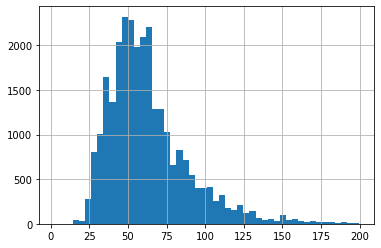

In [473]:
df=df[df['powierzchnia']<200]
df['powierzchnia'].hist(bins=50)

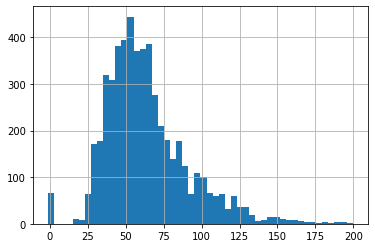

In [474]:
%matplotlib inline
df['powierzchnia-uzytkowa'].hist(bins=50)

In [475]:
df.drop(columns=['powierzchnia-uzytkowa'],inplace=True) # usunięcie zmiennej powierzchnia użytkowa - duplikująca się cecha

In [476]:
df.columns

Index(['kuchnia', 'rynek', 'balkon', 'liczba_pieter_budynku', 'rok_budowy',
       'miasto', 'liczba_pokoi', 'wykonczenie', 'ulica', 'pietro',
       'rodzaj_zabudowy', 'powierzchnia', 'dzielnica', 'forma-wlasnosci',
       'cena', 'adres', 'serwis', 'material_budynku', 'oferta', 'ogrzewanie',
       'winda', 'czynsz', 'typ_ogrzewania', 'dodatkowe_informacje',
       'ulica_i_nr'],
      dtype='object')

In [477]:
df=df.replace([None],-1)

## Ujednolicenie danych

### Kuchnia

In [478]:
df['kuchnia'].value_counts()

-1                           15992
0                             4309
-1                            3183
oddzielna                     1141
w aneksie                      834
1                              682
aneks                          589
półotwarta                     317
z oknem                        217
brak                           179
otwarta                        152
bez okna                         6
wnęka                            4
zamknięta                        4
kuchnia otwarta bez okna         3
kuchnia z jadalnią               3
otwarta na pokój                 1
okno na pokój                    1
Name: kuchnia, dtype: int64

In [479]:
df['kuchnia']=df['kuchnia'].replace(0,'brak').replace(1,-1)

In [480]:
df['kuchnia'].unique()

array(['półotwarta ', 'aneks', '-1', 'brak', 'brak ', -1, 'z oknem',
       'oddzielna', 'otwarta ', 'w aneksie', 'okno na pokój ',
       'bez okna ', 'zamknięta ', 'kuchnia otwarta bez okna ',
       'kuchnia z jadalnią ', 'otwarta na pokój ', 'wnęka '], dtype=object)

In [481]:
df['kuchnia']=df['kuchnia'].astype('str')

In [482]:
df['kuchnia'].value_counts()

-1                           19857
brak                          4309
oddzielna                     1141
w aneksie                      834
aneks                          589
półotwarta                     317
z oknem                        217
brak                           179
otwarta                        152
bez okna                         6
wnęka                            4
zamknięta                        4
kuchnia otwarta bez okna         3
kuchnia z jadalnią               3
okno na pokój                    1
otwarta na pokój                 1
Name: kuchnia, dtype: int64

In [483]:
df['kuchnia'].value_counts()

-1                           19857
brak                          4309
oddzielna                     1141
w aneksie                      834
aneks                          589
półotwarta                     317
z oknem                        217
brak                           179
otwarta                        152
bez okna                         6
wnęka                            4
zamknięta                        4
kuchnia otwarta bez okna         3
kuchnia z jadalnią               3
okno na pokój                    1
otwarta na pokój                 1
Name: kuchnia, dtype: int64

### Rynek

In [484]:
df['rynek'].value_counts()

-1            17303
wtórny         4116
wtórny         3553
pierwotny      1438
pierwotny      1207
Name: rynek, dtype: int64

In [485]:
df['rynek'].unique()

array(['wtórny ', 'pierwotny ', 'wtórny', 'pierwotny', -1], dtype=object)

In [486]:
df['rynek']=df['rynek'].str.strip()

In [487]:
df['rynek'].value_counts()

wtórny       7669
pierwotny    2645
Name: rynek, dtype: int64

In [488]:
df['rynek']=df['rynek'].replace([None],-1)

In [489]:
df['rynek'].value_counts()

-1           17303
wtórny        7669
pierwotny     2645
Name: rynek, dtype: int64

### Balkon

In [490]:
df['balkon'].value_counts()

-1      22294
tak      2654
-1       2284
nie       385
Name: balkon, dtype: int64

In [491]:
df['balkon']=df['balkon'].astype('str')

In [492]:
df['balkon'].value_counts()

-1      24578
tak      2654
nie       385
Name: balkon, dtype: int64

### Liczba pięter budynku

In [493]:
df['liczba_pieter_budynku'].value_counts()

4             6478
3             6147
2             2710
10            1827
5             1528
4             1007
3              973
6              897
1              609
-1             530
17             525
2              476
7              474
0              454
8              436
5              338
11             294
12             271
10             261
9              208
17             202
6              129
16             128
1              121
8               96
18              81
7               66
12              55
11              50
9               41
13              34
38              24
16              23
15              21
28              17
18              14
24               9
32               8
19               8
20               6
14               5
15               5
13               4
powyżej 30       4
24               3
25               3
29               3
28               3
33               2
23               2
100              2
25               1
14          

In [494]:
df['liczba_pieter_budynku']=df['liczba_pieter_budynku'].replace('powyżej 30', 31).replace(100,-1)

In [495]:
df['liczba_pieter_budynku'].value_counts()

4     6478
3     6147
2     2710
10    1827
5     1528
4     1007
3      973
6      897
1      609
-1     532
17     525
2      476
7      474
0      454
8      436
5      338
11     294
12     271
10     261
9      208
17     202
6      129
16     128
1      121
8       96
18      81
7       66
12      55
11      50
9       41
13      34
38      24
16      23
15      21
28      17
18      14
24       9
32       8
19       8
20       6
14       5
15       5
31       4
13       4
29       3
25       3
28       3
24       3
33       2
23       2
25       1
14       1
21       1
19       1
23       1
Name: liczba_pieter_budynku, dtype: int64

In [496]:
df['liczba_pieter_budynku']=df['liczba_pieter_budynku'].replace([None],-1)

In [497]:
df['liczba_pieter_budynku'].value_counts()

4     6478
3     6147
2     2710
10    1827
5     1528
4     1007
3      973
6      897
1      609
-1     532
17     525
2      476
7      474
0      454
8      436
5      338
11     294
12     271
10     261
9      208
17     202
6      129
16     128
1      121
8       96
18      81
7       66
12      55
11      50
9       41
13      34
38      24
16      23
15      21
28      17
18      14
24       9
32       8
19       8
20       6
14       5
15       5
31       4
13       4
29       3
25       3
28       3
24       3
33       2
23       2
25       1
14       1
21       1
19       1
23       1
Name: liczba_pieter_budynku, dtype: int64

### Rok budowy

In [498]:
df['rok_budowy'].value_counts()

 2019.0    2195
 2020.0    2185
 0.0       1993
-1.0       1881
 1980.0    1126
 1970.0     945
 2021.0     889
 2018.0     865
 2012.0     725
 2017.0     682
 2013.0     586
 2011.0     550
 2016.0     516
 1960.0     509
 2009.0     491
 2015.0     456
 1950.0     438
 1975.0     405
 2010.0     401
 2000.0     396
 2008.0     371
 1978.0     352
 1930.0     341
 2007.0     334
 2014.0     324
 1920.0     308
 2006.0     306
 1976.0     289
 2005.0     258
 2003.0     251
           ... 
 1913.0      10
 1949.0       9
 1924.0       7
 1941.0       7
 1942.0       7
 1914.0       6
 1.0          6
 1498.0       6
 1893.0       5
 1933.0       5
 1931.0       4
 1909.0       4
 2029.0       4
 1888.0       3
 1875.0       3
 1809.0       3
 1922.0       2
 1899.0       2
 1943.0       2
 191.0        2
 19.0         2
 200.0        2
 1891.0       2
 1919.0       2
 90.0         2
 190.0        2
 1947.0       2
 10.0         2
 1892.0       1
 150.0        1
Name: rok_budowy, Length

In [499]:
df=df[df['rok_budowy']>1000]

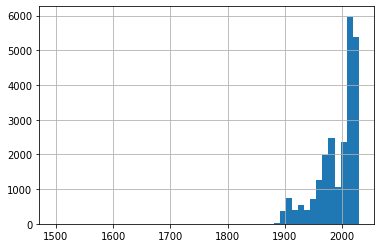

In [500]:
%matplotlib inline
df['rok_budowy'].hist(bins=50)

### Miasto

In [501]:
df['miasto'].value_counts()

-1             11110
Gdańsk          5015
gdańsk          2958
Gdynia          2362
gdynia          1267
Sopot            589
sopot            413
Rumia              5
Chwaszczyno        4
Żukowo             1
Name: miasto, dtype: int64

In [502]:
df['miasto']=df['miasto'].replace('sopot','Sopot').replace('gdańsk','Gdańsk').replace('gdynia','Gdynia')

In [503]:
df['miasto'].value_counts()

-1             11110
Gdańsk          7973
Gdynia          3629
Sopot           1002
Rumia              5
Chwaszczyno        4
Żukowo             1
Name: miasto, dtype: int64

### Liczba pokoi

In [504]:
df['liczba_pokoi'].value_counts()

3               8226
2               7490
4               3108
1               1215
3               1046
2                972
5                679
4                456
6                168
1                135
5                 91
0                 37
6                 28
7                 25
-1                18
9                 12
7                  7
8                  5
10                 3
więcej niż 8       3
Name: liczba_pokoi, dtype: int64

In [505]:
df['liczba_pokoi']=df['liczba_pokoi'].replace('więcej niż 8', 9).replace(0,-1)

In [506]:
df['liczba_pokoi'].value_counts()

3     8226
2     7490
4     3108
1     1215
3     1046
2      972
5      679
4      456
6      168
1      135
5       91
-1      55
6       28
7       25
9       15
7        7
8        5
10       3
Name: liczba_pokoi, dtype: int64

### Wykonczenie

In [507]:
df['wykonczenie'].value_counts()

-1                                     14964
-1                                      3130
dozamieszkania                          2322
dowykończenia                           1133
wysoki standard                          408
doremontu                                308
do wykończenia                           193
bardzo wysoki standard                   182
dobry                                    167
deweloperski                             167
bardzo dobry                             118
do remontu                               112
do remontu                               104
stan deweloperski                         67
dobry                                     61
wysoki standard                           61
do odświeżenia                            48
do odświeżenia                            47
do adaptacji                              21
świeżo po remoncie                        18
idealny                                   15
normalny                                  15
do remontu

In [508]:
df['wykonczenie']=df['wykonczenie'].astype('str')

In [509]:
df['wykonczenie']=df['wykonczenie'].str.strip()

In [510]:
df['wykonczenie'].value_counts()

-1                                    18094
dozamieszkania                         2322
dowykończenia                          1133
wysoki standard                         469
doremontu                               308
dobry                                   228
do remontu                              216
do wykończenia                          193
bardzo wysoki standard                  182
deweloperski                            167
bardzo dobry                            118
do odświeżenia                           95
stan deweloperski                        67
do adaptacji                             21
świeżo po remoncie                       18
normalny                                 15
do remontu kapit.                        15
idealny                                  15
nowy                                     11
do wprowadzenia                          11
po generalnym remoncie                    5
po remoncie                               4
do odnowienia                   

### Ulica

In [511]:
df['ulica'].value_counts()

-1                                19086
-1                                  503
morena,                              96
myśliwska                            59
nasypowa                             46
grudziądzka                          45
wałowa                               42
toruńska                             40
śródmieście                          38
obrońców wybrzeża                    38
św. barbary                          38
gen. józefa hallera                  37
ul. kartuska                         32
władysława łokietka                  27
chmielna                             26
stężycka                             25
potęgowska                           24
bolesława chrobrego                  24
nadmorski dwór                       23
botanica,                            23
szafarnia                            23
dąbrowszczaków                       23
jacka malczewskiego                  22
al. grunwaldzka                      21
ogarna                               21


In [512]:
df['ulica']=df['ulica'].str.strip()

In [513]:
df['ulica'].value_counts()

-1                               503
morena,                           96
myśliwska                         59
nasypowa                          46
grudziądzka                       45
wałowa                            42
toruńska                          40
śródmieście                       38
św. barbary                       38
obrońców wybrzeża                 38
gen. józefa hallera               37
ul. kartuska                      32
władysława łokietka               27
chmielna                          26
stężycka                          25
bolesława chrobrego               24
potęgowska                        24
szafarnia                         23
nadmorski dwór                    23
botanica,                         23
dąbrowszczaków                    23
jacka malczewskiego               22
ogarna                            21
al. grunwaldzka                   21
rdestowa                          20
adama mickiewicza                 20
śródmieście,                      20
k

### Piętro

In [514]:
df['pietro'].value_counts()

1               3276
2               2564
3               2377
Parter          1967
4               1459
1               1231
0                972
2                916
3                850
5                517
parter           502
4                455
6                355
3 / 3            315
2 / 3            294
3 / 4            288
1 / 3            283
parter / 3       282
1 / 4            265
4 / 4            237
1 / 2            214
2 / 4            204
parter / 4       197
parter / 2       195
5                173
10               167
2 / 2            166
9                164
8                162
-1               159
                ... 
2 / 15             1
6 / 13             1
poddasze           1
parter / 9         1
7 / 18             1
8 / 16             1
12 / 16            1
9 / 15             1
11                 1
18 / 29            1
4 / 13             1
2 / 13             1
17 / 18            1
27                 1
20 / 38            1
4 / 16             1
11 / 14      

In [515]:
df['pietro']=df['pietro'].replace('parter',0).replace('poddasze',-1).replace('powyżej 30',31)

In [516]:
df['pietro'].unique()

array(['parter / 3 ', 'parter / 7 ', '1 / 4 ', '2 / 5 ', 1, 3, 2, 5,
       '1 / 12 ', 0, 11, 4, '4 / 4 ', '1 / 5 ', '1 / 6 ', 8, 9, '1 / 2 ',
       '3 / 4 ', 6, 'parter / 1 ', 'parter / 6 ', '2 / 6 ', '2 / 4 ',
       'parter / 4 ', '1 / 1 ', 7, '2 / 2 ', '8 / 10 ', 'parter / 2 ',
       '5 / 10 ', '1 / 18 ', 'parter / 10 ', -1, '3 / 3 ', '1 / 3 ',
       '4 / 9 ', 10, '9 / 17 ', '3', '2', '4', '1', '5', '6', '6 / 10 ',
       '9', '6 / 17 ', '6 / 8 ', '2 / 18 ', '10', '4 / 5 ', '6 / 12 ',
       '3 / 5 ', '5 / 9 ', '14 / 17 ', '11', '3 / 11 ', '7 / 10 ',
       '2 / 3 ', '8', '2 / 17 ', '7', '5 / 17 ', '4 / 17 ', '8 / 17 ',
       '7 / 17 ', '3 / 17 ', '10 / 17 ', 31, '12 / 17 ', '11 / 17 ',
       '13 / 17 ', '5 / 5 ', '7 / 7 ', '18', '15 / 17 ', '16 / 17 ',
       '17 / 17 ', '14', '3 ', '5 ', '6 / 6 ', 'parter / 5 ', '27',
       '4 / 10 ', '12', '15 / 16 ', '10 / 10 ', '15', '4 / 6 ', '17',
       '2 / 10 ', '6 / 7 ', '16 / 16 ', '16', '5 / 16 ', '13', '3 / 6 ',
       '1 / 7 ',

### Rodzaj zabudowy

In [517]:
df['rodzaj_zabudowy'].value_counts()

-1                               12545
blok                              3685
-1                                1808
apartamentowiec                   1749
kamienica                          974
apartamentowiec                    891
blok mieszkalny                    624
kamienica                          443
niski blok                         401
blok                               196
wieżowiec                          159
dom wielorodzinny/szeregowiec       63
domwolnostojący                     52
dom wielorodzinny                   27
szeregowiec                         16
falowiec                            14
niski wielorodzinny                 13
dom                                 10
nowe budownictwo                    10
budynek wielorodzinny                7
mieszkalno-biurowy                   6
willa                                6
bliźniak                             4
budynek wolnostojący                 3
szeregowy                            3
inny                     

In [518]:
df['rodzaj_zabudowy']=df['rodzaj_zabudowy'].str.strip()

In [519]:
df['rodzaj_zabudowy'].value_counts()

blok                             3881
apartamentowiec                  2640
-1                               1808
kamienica                        1417
blok mieszkalny                   624
niski blok                        401
wieżowiec                         159
dom wielorodzinny/szeregowiec      63
domwolnostojący                    52
dom wielorodzinny                  27
szeregowiec                        17
falowiec                           14
niski wielorodzinny                13
nowe budownictwo                   10
dom                                10
budynek wielorodzinny               7
willa                               6
mieszkalno-biurowy                  6
bliźniak                            4
szeregowy                           3
budynek wolnostojący                3
historyczny/zabytkowy               3
inny                                3
loft                                3
budynek apartamentowy               1
zabytkowy                           1
kamienica wo

### Powierzchnia

In [520]:
df['powierzchnia'].value_counts()

38.00     329
45.00     283
53.00     274
60.00     266
50.00     262
54.00     242
63.00     231
48.00     224
70.00     206
65.00     205
46.00     201
42.00     189
67.00     188
47.00     184
44.00     178
43.00     177
49.00     174
40.00     169
56.00     168
64.00     163
55.00     159
58.00     159
30.00     145
28.00     142
37.00     140
52.00     139
41.00     138
33.00     135
85.00     132
48.20     128
         ... 
64.43       1
84.28       1
83.53       1
32.32       1
123.31      1
39.29       1
39.96       1
56.89       1
45.41       1
39.63       1
44.83       1
39.27       1
30.43       1
65.76       1
49.95       1
46.47       1
108.90      1
52.26       1
34.45       1
53.83       1
54.31       1
88.42       1
80.16       1
68.93       1
63.34       1
93.50       1
48.17       1
83.02       1
32.74       1
46.23       1
Name: powierzchnia, Length: 2384, dtype: int64

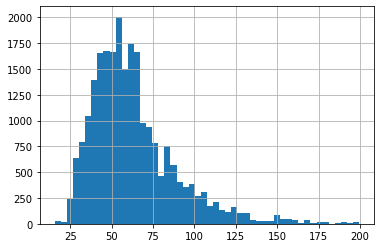

In [521]:
%matplotlib inline
df['powierzchnia'].hist(bins=50)

### Dzielnica

In [522]:
df['dzielnica'].value_counts()

-1                                 16342
śródmieście                          528
Śródmieście                          362
wrzeszcz                             296
Wrzeszcz                             228
gdańsk                               220
przymorze                            216
jasień                               190
morena                               190
pomorskie                            154
Przymorze                            152
dolny                                139
brzeźno                              126
gdynia                               123
stare miasto                         115
piecki-migowo                        111
orłowo                               111
oksywie                              109
Jasień                                98
obłuże                                95
mały kack                             92
zaspa                                 91
StareMiasto                           89
Morena                                84
Brzeźno         

In [523]:
df['dzielnica']=df['dzielnica'].str.strip().str.lower()

In [524]:
df['dzielnica']=df['dzielnica'].replace([None],-1)

In [525]:
df['dzielnica'].value_counts()

-1                          16342
śródmieście                   890
wrzeszcz                      524
przymorze                     368
morena                        307
jasień                        288
dolny                         234
gdańsk                        220
brzeźno                       208
orłowo                        161
zaspa                         157
pomorskie                     154
obłuże                        152
oliwa                         138
gdynia                        125
piecki-migowo                 121
oksywie                       120
pogórze                       117
łostowice                     116
stare miasto                  115
siedlce                       103
dąbrowa                        96
mały kack                      92
staremiasto                    89
redłowo                        89
ujeścisko                      87
chełm                          83
chylonia                       80
centrum                        79
jelitkowo     

### Forma własności

In [526]:
df['forma-wlasnosci'].value_counts()

-1                                   19086
-1                                    2684
własność                              1644
spółdzielcze własnościowe               91
spółdzielcze własnościowe z kw          73
(nieznany)                              42
odrębna własność                        18
odrębna własność lokalu                 16
pełna własność                          15
inna                                    10
spółdzielcze-własnościowe                7
spółdzielcze-własnościowe z kw           6
pełna własność (hipoteczne)              5
spół. własnościowe z kw                  4
spółdzielcze wł. z kw                    3
spółdzielcza własnościowa bez kw         3
współwłasność                            3
wieczyste użytkowanie                    3
spółdzielcza własnościowa z kw           3
-                                        2
spół. własnościowe                       2
użytkowanie wieczyste                    1
ekspektatywa                             1
umowa z dev

In [527]:
df['forma-wlasnosci']=df['forma-wlasnosci'].str.strip()

In [528]:
df['forma-wlasnosci'].value_counts()

-1                                  2684
własność                            1644
spółdzielcze własnościowe             91
spółdzielcze własnościowe z kw        73
(nieznany)                            42
odrębna własność                      18
odrębna własność lokalu               16
pełna własność                        15
inna                                  10
spółdzielcze-własnościowe              7
spółdzielcze-własnościowe z kw         6
pełna własność (hipoteczne)            5
spół. własnościowe z kw                4
spółdzielcza własnościowa z kw         3
współwłasność                          3
spółdzielcze wł. z kw                  3
wieczyste użytkowanie                  3
spółdzielcza własnościowa bez kw       3
-                                      2
spół. własnościowe                     2
ekspektatywa                           1
użytkowanie wieczyste                  1
umowa z developerem                    1
hipoteczne                             1
Name: forma-wlas

### Cena

In [529]:
df['cena'].value_counts()

499000.00     469
599000.00     310
449000.00     299
399000.00     275
699000.00     210
349000.00     203
799000.00     177
375000.00     176
379000.00     170
649000.00     169
450000.00     163
425000.00     163
429000.00     160
369000.00     159
299000.00     159
690000.00     151
469000.00     151
439000.00     149
420000.00     148
419000.00     142
539000.00     141
440000.00     135
650000.00     134
479000.00     133
489000.00     131
545000.00     130
350000.00     125
899000.00     125
550000.00     125
849000.00     122
             ... 
762649.00       1
1093740.00      1
579282.00       1
763123.00       1
1722811.00      1
1395125.00      1
546342.00       1
296033.83       1
861375.00       1
512577.00       1
381500.00       1
248091.00       1
1486129.00      1
397862.00       1
293911.00       1
1945000.00      1
502750.00       1
437101.00       1
612081.00       1
2050036.00      1
387972.00       1
276088.00       1
469898.00       1
598958.00       1
446929.00 

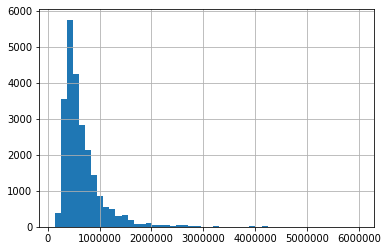

In [530]:
%matplotlib inline
df['cena'].hist(bins=50)

In [531]:
df['cena']=df['cena'].replace([None],-1)

In [532]:
df=df[df['cena']<1500000]

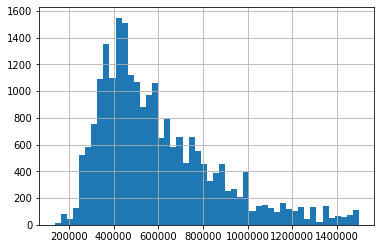

In [533]:
%matplotlib inline
df['cena'].hist(bins=50)

### Adres

In [534]:
df['adres'].value_counts()

Gdańsk,Śródmieście,pomorskie                               281
Gdańsk,Wrzeszcz,pomorskie                                  217
Gdańsk, Śródmieście                                        202
Gdańsk, Wrzeszcz, Grudziądzka                              164
Gdańsk, Wrzeszcz                                           154
Gdańsk,Przymorze,pomorskie                                 151
Gdańsk, Śródmieście, Wałowa                                148
Gdańsk, Przymorze                                          141
Gdynia, pomorskie                                          137
Gdańsk, Morena, Myśliwska                                  126
Sopot, Wyścigi, Karlikowo, Władysława, Łokietka            111
Gdynia, Oksywie                                            111
Gdańsk, Przymorze, Obrońców, Wybrzeża                      101
Sopot, Dolny, Sopot, Niepodległości                         99
Gdańsk,Jasień,pomorskie                                     98
gdańsk, piecki-migowo, morena,                         

In [535]:
df['adres']=df['adres'].replace([None],-1)

In [536]:
df['adres'].value_counts()

Gdańsk,Śródmieście,pomorskie                               281
Gdańsk,Wrzeszcz,pomorskie                                  217
Gdańsk, Śródmieście                                        202
Gdańsk, Wrzeszcz, Grudziądzka                              164
Gdańsk, Wrzeszcz                                           154
Gdańsk,Przymorze,pomorskie                                 151
Gdańsk, Śródmieście, Wałowa                                148
Gdańsk, Przymorze                                          141
Gdynia, pomorskie                                          137
Gdańsk, Morena, Myśliwska                                  126
Sopot, Wyścigi, Karlikowo, Władysława, Łokietka            111
Gdynia, Oksywie                                            111
Gdańsk, Przymorze, Obrońców, Wybrzeża                      101
Sopot, Dolny, Sopot, Niepodległości                         99
Gdańsk,Jasień,pomorskie                                     98
gdańsk, piecki-migowo, morena,                         

### Matrial budynku

In [537]:
df['material_budynku'].value_counts()

-1                             16283
-1                              2902
cegła                            770
cegła                            604
inne                             392
wielkapłyta                      352
pustak                           308
wielka płyta                     234
pustak                           221
silikat                          179
konstrukcja mieszana              78
ytong                             72
żelbet                            55
beton                             54
inne                              45
silikat                           45
tradycyjna                        24
zróżnicowany                      21
mieszana                          18
konstrukcja żelbetowa             17
beton                             14
beton, cegła                       9
mieszany                           9
murowana                           8
płyta                              7
cegła przedwojenna                 7
porotherm                          5
b

In [538]:
df['material_budynku']=df['material_budynku'].str.strip()

In [539]:
df['material_budynku'].value_counts()

-1                            2902
cegła                         1374
pustak                         529
inne                           437
wielkapłyta                    352
wielka płyta                   234
silikat                        224
konstrukcja mieszana            78
ytong                           72
beton                           68
żelbet                          55
tradycyjna                      24
zróżnicowany                    21
mieszana                        18
konstrukcja żelbetowa           17
beton, cegła                     9
mieszany                         9
murowana                         8
cegła przedwojenna               7
płyta                            7
betonkomórkowy                   5
porotherm                        5
beton komórkowy                  4
rama h                           3
inna                             2
drewno                           2
wielkopłytowa                    2
gazobeton                        2
cegła, płyta        

In [540]:
df['material_budynku']=df['material_budynku'].replace('wielkapłyta','wielka płyta').replace('płyta', 'wielka płyta').replace('wielkopłytowa', 'wielka płyta').replace('konstrukcja mieszana','mieszana').replace('mieszany','mieszana')

In [541]:
df['material_budynku'].value_counts()

-1                            2902
cegła                         1374
wielka płyta                   595
pustak                         529
inne                           437
silikat                        224
mieszana                       105
ytong                           72
beton                           68
żelbet                          55
tradycyjna                      24
zróżnicowany                    21
konstrukcja żelbetowa           17
beton, cegła                     9
murowana                         8
cegła przedwojenna               7
betonkomórkowy                   5
porotherm                        5
beton komórkowy                  4
rama h                           3
inna                             2
drewno                           2
gazobeton                        2
cegła, płyta                     1
cegła + styropian                1
beton, płyta                     1
pustak ceramiczny                1
cegła czerwona                   1
beton, ocieplony, pł

### Oferta

In [542]:
df['oferta'].value_counts()

-1                            17773
Oferta biura nieruchomości     4412
Oferta dewelopera               296
Oferta prywatna                 283
Name: oferta, dtype: int64

### Ogrzewanie

In [543]:
df['ogrzewanie'].value_counts()

-1              19037
miejskie         3116
gazowe            398
inne              116
elektryczne        67
kotłownia          29
piecekaflowe        1
Name: ogrzewanie, dtype: int64

### Winda

In [544]:
df['winda'].value_counts() # 0 - jest winda, 1- brak windy

-1.0    17773
 0.0     2793
 1.0     2198
Name: winda, dtype: int64

### Czynsz

In [545]:
df['czynsz'].value_counts()

-1.00       21515
 400.00       150
 450.00       111
 500.00       110
 350.00       109
 300.00        81
 600.00        66
 550.00        52
 700.00        29
 250.00        28
 200.00        25
 420.00        20
 650.00        19
 380.00        18
 430.00        15
 370.00        13
 340.00        13
 5.00          13
 260.00        13
 480.00        13
 320.00        11
 280.00        11
 390.00        11
 460.00        11
 330.00        11
 180.00        11
 270.00        11
 800.00        10
 360.00        10
 120.00        10
            ...  
 382.00         1
 629.00         1
 248.00         1
 204.00         1
 50.00          1
 645.00         1
 723.00         1
 616.00         1
 375.00         1
 565.00         1
 613.00         1
 463.02         1
 405.00         1
 240.50         1
 555.00         1
 342.00         1
 425.00         1
 369.00         1
 362.00         1
 591.00         1
 499.00         1
 1100.00        1
 272.00         1
 299.00         1
 549.00   

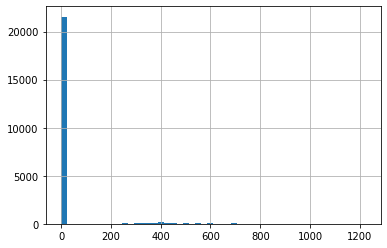

In [546]:
%matplotlib inline
df['czynsz'].hist(bins=50)

### Typ ogrzewania

In [547]:
df['typ_ogrzewania'].value_counts()

-1                                                  15613
Co miejskie                                          3380
C. o. miejskie                                       1180
Miejskie                                              824
Gazowe                                                813
Centralne                                             174
Co własne                                             166
Elektryczne                                           151
Ogrzewanie miejskie                                    72
Co                                                     64
C. o.                                                  46
C. o. z sieci miejskiej                                46
C. o. gazowe                                           29
Kotłownia lokalna                                      22
Inne                                                   19
Ogrzewanie na gaz miejski                              16
Miejski                                                12
Kotłownia     

### Dodatkowe informacje

In [548]:
df['dodatkowe_informacje'].value_counts()

-1                                                                                                                                                                            13796
Piwnica                                                                                                                                                                         358
Balkon, Piwnica                                                                                                                                                                 279
Balkon, Miejsce parkingowe                                                                                                                                                      267
Balkon, Winda, Miejsce parkingowe                                                                                                                                               250
Miejsce parkingowe                                                                                  

### Ulica i nr

In [549]:
df['ulica_i_nr'].value_counts()

-1                                                                                          22095
Rzeczypospolitej 8/205                                                                        142
80-229 gdańsk, al. grunwaldzka 30/32 (wrzeszcz)                                                43
Świętojańska 43/23                                                                             39
80-257 gdańsk, juliusza słowackiego 37d                                                        34
80-766 gdańsk, henryka hubertusa jabłońskiego 26/9                                             34
80-398 gdańsk, obrońców wybrzeża 4c/22                                                         18
80-332 gdańsk, piastowska 44                                                                   16
80-254 gdańsk, partyzantów 8/107 (budynek quattro towers pierwsze piętro)                      16
81-805 sopot, al. niepodległości 804b/3                                                        15
80-531 gdańsk, sucha

### Serwis

In [550]:
df['serwis'].value_counts()

trojmiasto    10749
otodom         4991
morizon        4405
gratka         2619
Name: serwis, dtype: int64

In [551]:
df.shape

(22764, 25)

In [552]:
df.head()

,kuchnia,rynek,balkon,liczba_pieter_budynku,rok_budowy,miasto,liczba_pokoi,wykonczenie,ulica,pietro,...,adres,serwis,material_budynku,oferta,ogrzewanie,winda,czynsz,typ_ogrzewania,dodatkowe_informacje,ulica_i_nr
0,półotwarta,wtórny,nie,3,2018.0,Gdańsk,2,-1,piastowska,parter / 3,...,"gdańsk, oliwa, piastowska",morizon,-1,-1,-1,-1.0,-1.0,-1,-1,-1
1,półotwarta,wtórny,nie,3,2018.0,Gdańsk,2,-1,piastowska,parter / 3,...,"gdańsk, oliwa, piastowska",morizon,-1,-1,-1,-1.0,-1.0,-1,-1,-1
10,aneks,pierwotny,-1,7,2020.0,Gdańsk,2,do wykończenia,-1,parter / 7,...,"gdańsk, przymorze, -1",morizon,-1,-1,-1,-1.0,-1.0,-1,-1,-1
100,-1,wtórny,tak,4,2018.0,Gdańsk,3,-1,gen. józefa hallera,1 / 4,...,"gdańsk, wrzeszcz, gen. józefa hallera",morizon,-1,-1,-1,-1.0,-1.0,-1,-1,-1
1000,-1,wtórny,tak,5,2019.0,Gdańsk,3,-1,opacka,2 / 5,...,"gdańsk, oliwa, opacka",morizon,inne,-1,-1,-1.0,-1.0,-1,-1,-1


### Zapis danych

In [553]:
df.to_json('przygotowane_dane.json')

NameError: name 'df1' is not defined